# Clasificación de estrellas

**Table of contents**<a id='toc0_'></a>    
- 1. [¿Por qué?](#toc1_)    
- 2. [¿Desde cuando?](#toc2_)    
- 3. [¿Como?](#toc3_)    
  - 3.1. [Importamos las librerias](#toc3_1_)    
  - 3.2. [Cargamos el fichero con los identificadores de estrellas](#toc3_2_)    
  - 3.3. [Creamos las listas donde guardaremos la información de los espectros](#toc3_3_)    
  - 3.4. [Nos descargamos los espectros y añadimos los valores a las listas](#toc3_4_)    
  - 3.5. [Comprobamos que esta todo bien](#toc3_5_)    
  - 3.6. [Creamos un dataframe para realizar las gráficas de los espectros](#toc3_6_)    
  - 3.7. [Vemos cuantos tipos de estrellas hay en nuestros datos](#toc3_7_)    
  - 3.8. [Vemos la forma de los espectros de cada estrella](#toc3_8_)    
  - 3.9. [Creamos el dataframe que usaremos para entrenar nuestros modelos](#toc3_9_)    
  - 3.10. [Vemos que esta todo bien y vemos los valores](#toc3_10_)    
  - 3.11. [Importamos los modelos y separamos las estrellas con get_dummies](#toc3_11_)    
  - 3.12. [Buscamos el número de clusters óptimo por 2 métodos](#toc3_12_)    
    - 3.12.1. [El método del codo](#toc3_12_1_)    
    - 3.12.2. [El método de silhouette](#toc3_12_2_)    
  - 3.13. [Separamos nuestro modelo en entrenamiento y test](#toc3_13_)    
  - 3.14. [Añadimos los modelos de clasificación múltiple](#toc3_14_)    
    - 3.14.1. [Entrenámos los modelos y observamos su precisión](#toc3_14_1_)    
    - 3.14.2. [Comparamos la precisión de los modelos](#toc3_14_2_)    
    - 3.14.3. [Mostramos el las decisiones de Decision Tree Classifier](#toc3_14_3_)    
  - 3.15. [Añadimos los modelos de clasificación unilateral](#toc3_15_)    
    - 3.15.1. [Entrenamos los modelos para cada tipo de estrella](#toc3_15_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[¿Por qué?](#toc0_)

En primer lugar, permite una clasificación más rápida y precisa de objetos astronómicos en grandes cantidades de datos, lo que facilita la investigación en áreas como la astronomía de gran escala y la cosmología. La clasificación de objetos astronómicos, como galaxias, estrellas, cuásares, nebulosas, entre otros, es fundamental para entender el universo, y puede ser difícil y laboriosa de hacer manualmente.

## 2. <a id='toc2_'></a>[¿Desde cuando?](#toc0_)

La utilización de técnicas de IA para la clasificación de objetos astronómicos se ha utilizado desde hace décadas, y ha evolucionado con el tiempo, con el desarrollo de nuevos algoritmos de aprendizaje automático y la disponibilidad de grandes conjuntos de datos. Uno de los primeros casos de uso de técnicas de IA en astronomía fue en la década de 1960.

## 3. <a id='toc3_'></a>[¿Como?](#toc0_)

Hay muchas formas de realizar dicha clasificación. Pero en este caso haremos uso de los espectros de las estrellas

### 3.1. <a id='toc3_1_'></a>[Importamos las librerias](#toc0_)

In [2]:
import pandas as pd

import selenium as sel

import time

import numpy as np

from matplotlib import pyplot as plt



from astroML.datasets import fetch_sdss_spectrum 

import astropy.io.fits as fits 

### 3.2. <a id='toc3_2_'></a>[Cargamos el fichero con los identificadores de estrellas](#toc0_)

In [3]:
df = pd.read_csv("C:/Users/alvar/Documents/Tercero/Mineria de datos/Proyecto_final/optical_search_353180.csv", nrows = 10)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   #plate       10 non-null     int64  
 1   mjd          10 non-null     int64  
 2   fiberid      10 non-null     int64  
 3   run2d        10 non-null     object 
 4   specobj_id   10 non-null     object 
 5   ra           10 non-null     object 
 6   dec          10 non-null     object 
 7   sn_median_r  10 non-null     float64
 8   z            10 non-null     float64
 9   zerr         10 non-null     float64
 10  zwarning     10 non-null     int64  
 11  class        10 non-null     object 
 12  subclass     10 non-null     object 
dtypes: float64(3), int64(4), object(6)
memory usage: 1.1+ KB


### 3.3. <a id='toc3_3_'></a>[Creamos las listas donde guardaremos la información de los espectros](#toc0_)

In [4]:
Londa = []

Inten = []

err = []

tipo = []

In = []

Long = []

tipo2 = []


### 3.4. <a id='toc3_4_'></a>[Nos descargamos los espectros y añadimos los valores a las listas](#toc0_)

In [5]:
for index, row in df.iterrows():
    try:
        i = row['#plate']
        j = row['mjd']
        k = row['fiberid']
        t = row['subclass']
        spec = fetch_sdss_spectrum(int(i), int(j), int(k), data_home="E:/Espectros")
        tipo2.extend([t]*len(spec.wavelength()))
        tipo.append(t)
        Londa.append(spec.wavelength()) # Añadimos la longitud de onda que forma cada espectro en Å
        Inten.append(spec.spectrum) # Añadimos la intensidad que forma cada espectro en [1E-17 erg/cm2/s/Å]
        err.append(spec.error) # Añadimos el error de cada espectro
        for a , b, c in zip(spec.wavelength(), spec.spectrum, spec.error):
            Long.append(a)
            In.append(b)
            #err2.append(k)
    except Exception as e:
        # Manejo de la excepción
        print(f"Error con el espectro de Plate {i}, MJD {j} FiberID {k}: {str(e)}")
        continue

### 3.5. <a id='toc3_5_'></a>[Comprobamos que esta todo bien](#toc0_)

In [103]:
print(len(Long))
print(len(In))
print(len(tipo2))

print(len(tipo))
print(len(Londa))
print(len(Inten))
print(len(err))

38640
38640
38640
["'A0'", "'WD'", "'F2'", "'WD'", "'WD'", "'G2'", "'WD'", "'F5'", "'F5'", "'CV'"]
[array([3788.78533748, 3789.65783799, 3790.53053943, ..., 9217.22098659,
       9219.34357452, 9221.46665124]), array([3788.78533748, 3789.65783799, 3790.53053943, ..., 9217.22098659,
       9219.34357452, 9221.46665124]), array([3788.78533748, 3789.65783799, 3790.53053943, ..., 9217.22098659,
       9219.34357452, 9221.46665124]), array([3788.78533748, 3789.65783799, 3790.53053943, ..., 9217.22098659,
       9219.34357452, 9221.46665124]), array([3788.78533748, 3789.65783799, 3790.53053943, ..., 9217.22098659,
       9219.34357452, 9221.46665124]), array([3788.78533748, 3789.65783799, 3790.53053943, ..., 9217.22098659,
       9219.34357452, 9221.46665124]), array([3788.78533748, 3789.65783799, 3790.53053943, ..., 9217.22098659,
       9219.34357452, 9221.46665124]), array([3788.78533748, 3789.65783799, 3790.53053943, ..., 9217.22098659,
       9219.34357452, 9221.46665124]), array([3788.

### 3.6. <a id='toc3_6_'></a>[Creamos un dataframe para realizar las gráficas de los espectros](#toc0_)

In [19]:
graph = pd.DataFrame({'Longitud de onda [Å]': Londa, 'Intensidad [1E-17 erg/cm2/s/Å]': Inten, 'Error': err, 'Tipo': tipo})

graph.head()

dfGR = graph.copy()

### 3.7. <a id='toc3_7_'></a>[Vemos cuantos tipos de estrellas hay en nuestros datos](#toc0_)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "'A0'"),
  Text(1, 0, "'WD'"),
  Text(2, 0, "'F2'"),
  Text(3, 0, "'G2'"),
  Text(4, 0, "'F5'"),
  Text(5, 0, "'CV'")])

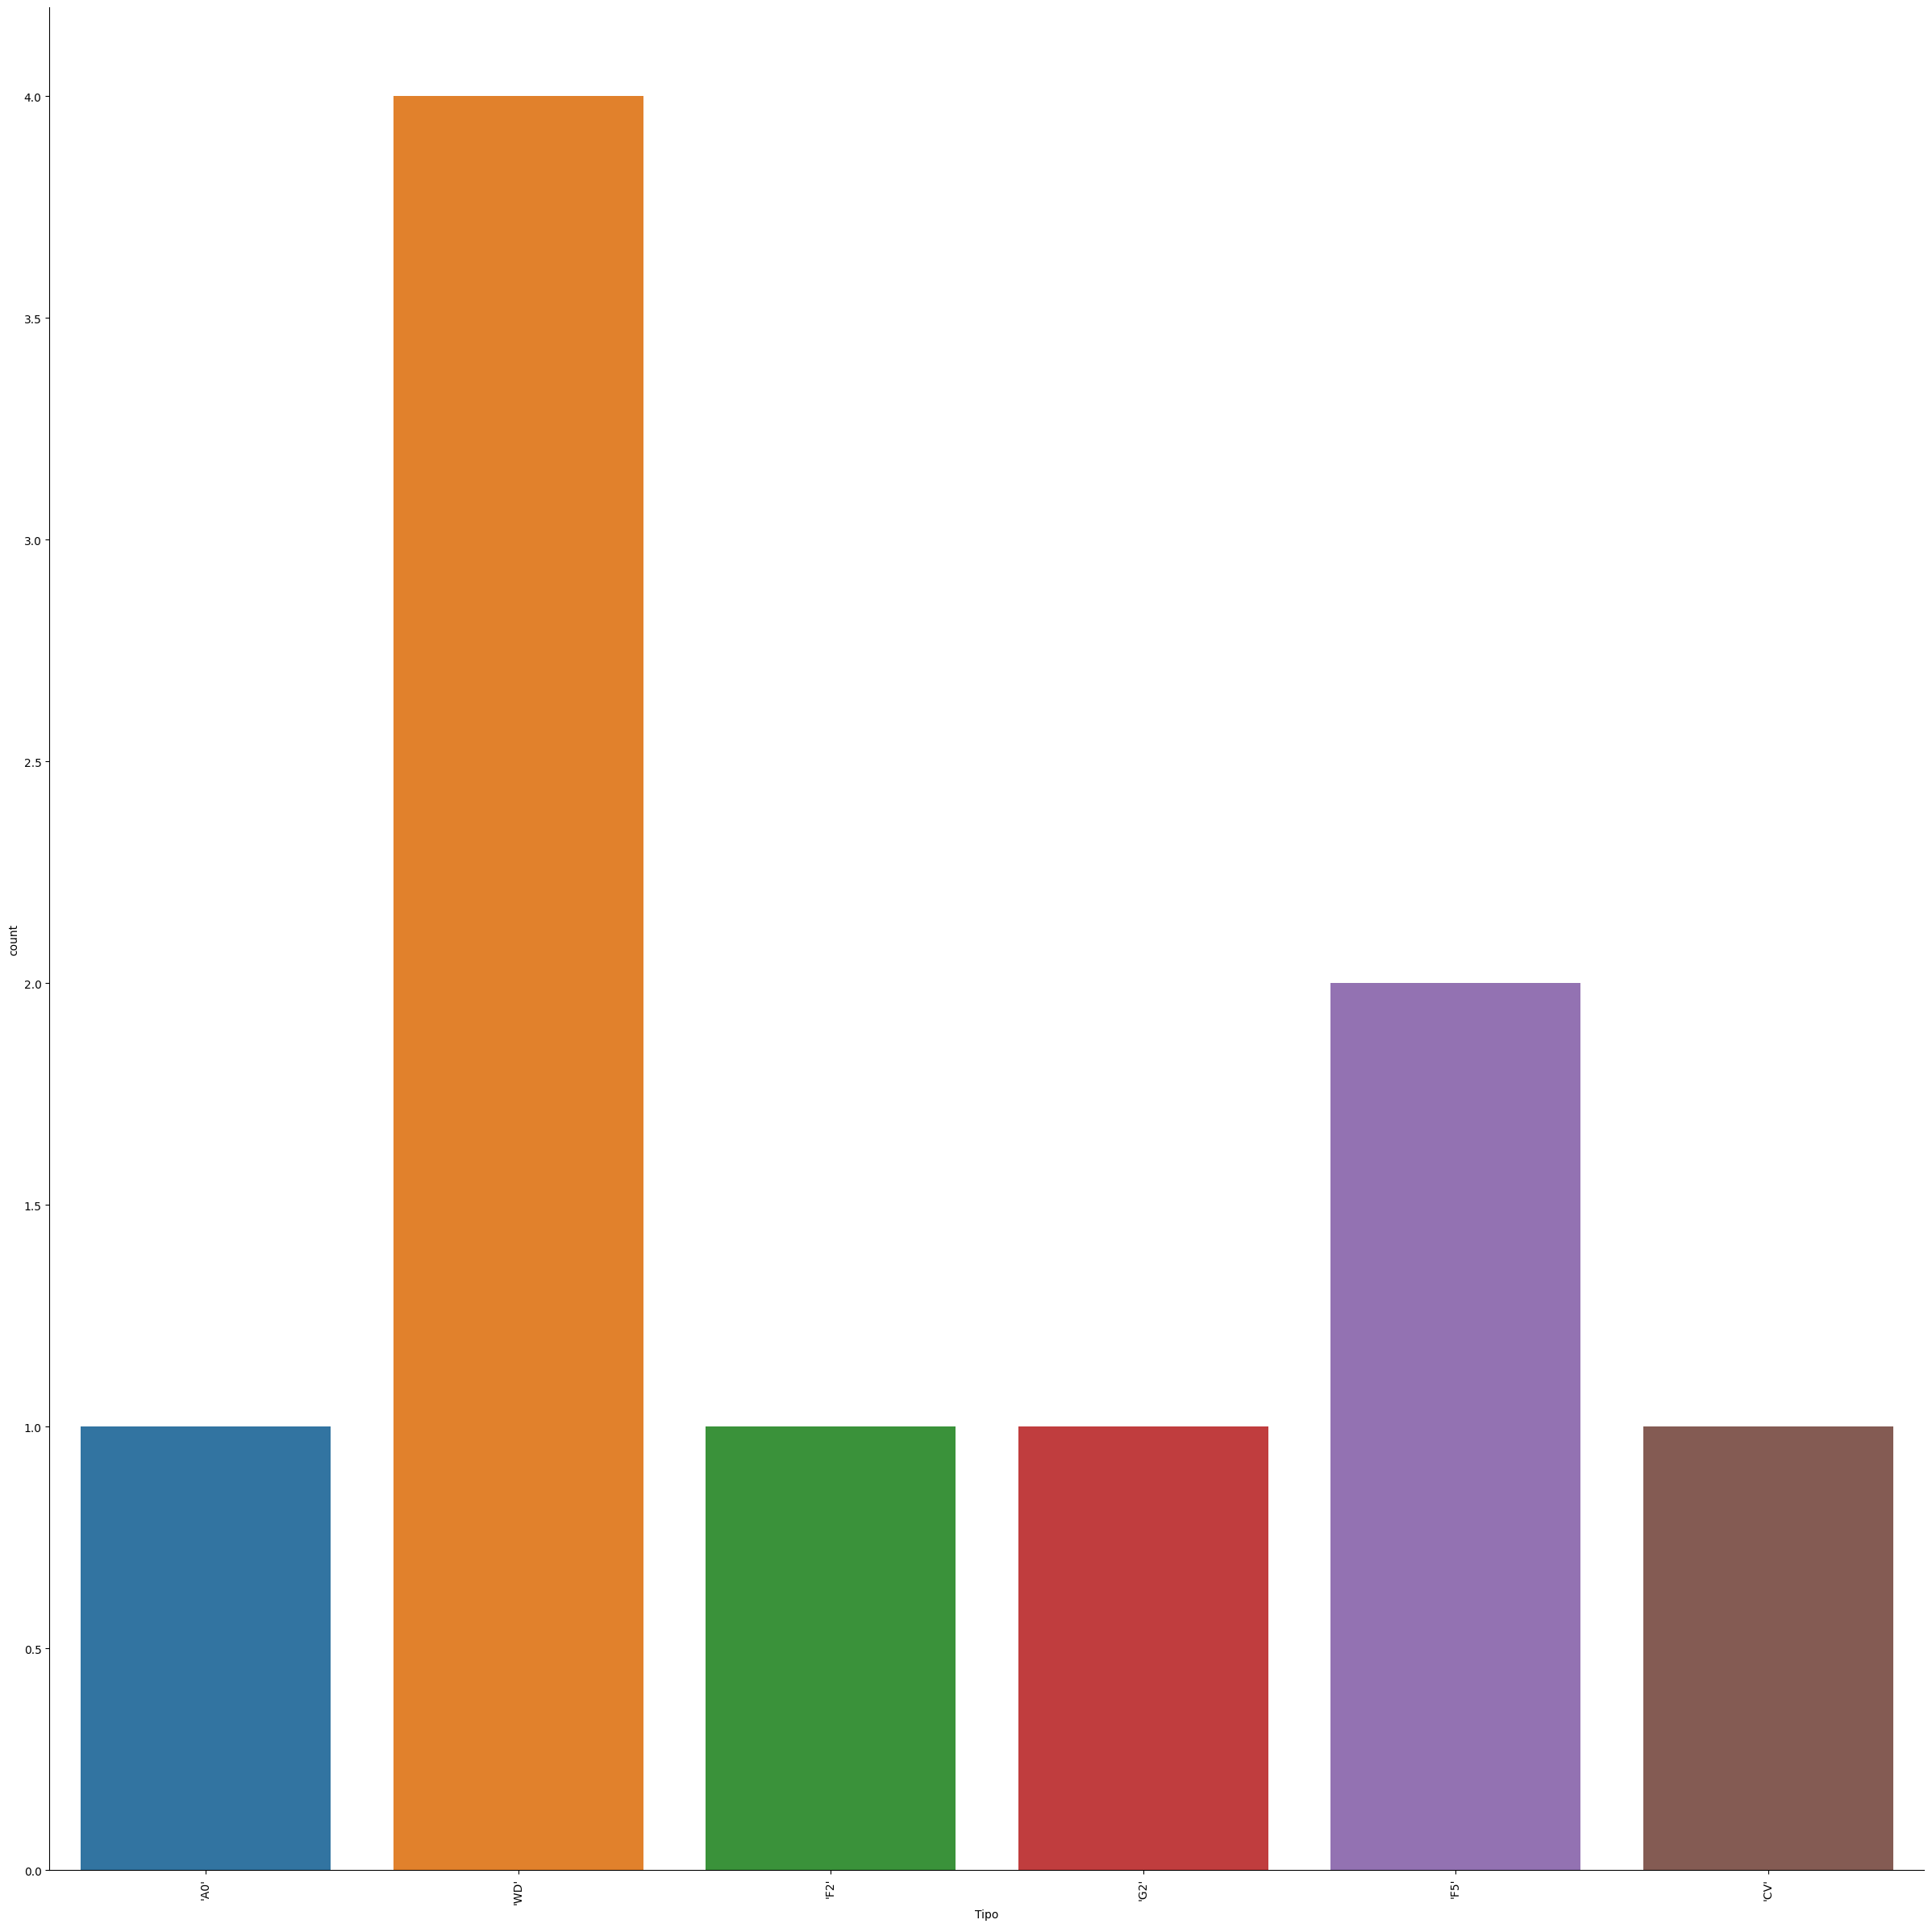

In [7]:
import seaborn as sns # pip install seaborn

f, ax = plt.subplots(figsize=(30, 30))
sns.despine(f)

sns.countplot(x = 'Tipo', data = dfGR, linewidth=.2)
plt.xticks(rotation=90,fontsize=10)

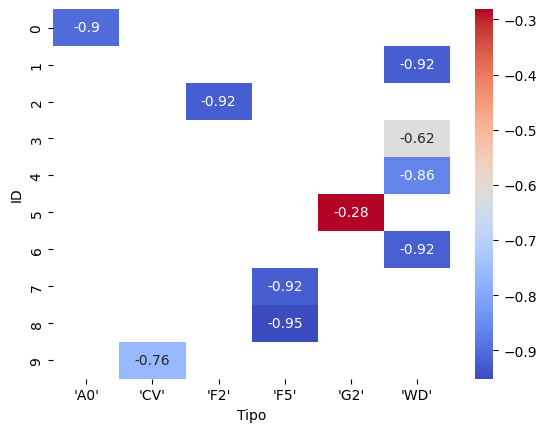

In [25]:

dfGR['ID'] = range(len(dfGR))
# Crear una nueva columna que contenga la correlación entre las columnas Columna1 y Columna2
dfGR['Correlacion'] = dfGR[['Longitud de onda [Å]', 'Intensidad [1E-17 erg/cm2/s/Å]']].apply(lambda x: pd.Series(x['Longitud de onda [Å]']).corr(pd.Series(x['Intensidad [1E-17 erg/cm2/s/Å]'])), axis=1)

# Crear un mapa de correlaciones utilizando un heatmap de seaborn
correlation_matrix = dfGR.pivot(index= 'ID', columns= 'Tipo', values= 'Correlacion')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Mostrar el mapa de correlaciones
plt.show()


In [23]:

corr1 = round(dfGR[['Longitud de onda [Å]', 'Tipo]']].corr(), 3)
corr2 = round(dfGR[['Intensidad [1E-17 erg/cm2/s/Å]', 'Tipo']].corr(), 3)
corr1.style.background_gradient()
corr2.style.background_gradient()

KeyError: "['Tipo]'] not in index"

### 3.8. <a id='toc3_8_'></a>[Vemos la forma de los espectros de cada estrella](#toc0_)

In [106]:
""" import plotly.graph_objects as go

for index, row in dfGR.iterrows():
    # Creamos una figura para cada fila
    fig = go.Figure()
    
    # Añadimos una línea para cada punto de la gráfica
    fig.add_trace(go.Scatter(x=row[0], y=row[1], mode='lines', line=dict(color='black', width=1), name='Espectro'))
    fig.add_trace(go.Scatter(x=row[0], y=row[2], mode='lines', line=dict(color='gray', width=2), name='Error en la intensidad'))
    #fig.add_trace(go.Scatter(x=row[0], y=, mode='lines', line=dict(color='red', width=1), name='Origen'))
    fig.update_layout(title=f'Estrela de tipo {row[3]}',xaxis_title='Longitud de onda [Å]', 
                      yaxis_title="Intensidad [1E-17 erg/cm2/s/Å]",
                      plot_bgcolor="white",paper_bgcolor="white")
    # Mostramos la figura
    fig.show() """

' import plotly.graph_objects as go\n\nfor index, row in dfGR.iterrows():\n    # Creamos una figura para cada fila\n    fig = go.Figure()\n    \n    # Añadimos una línea para cada punto de la gráfica\n    fig.add_trace(go.Scatter(x=row[0], y=row[1], mode=\'lines\', line=dict(color=\'black\', width=1), name=\'Espectro\'))\n    fig.add_trace(go.Scatter(x=row[0], y=row[2], mode=\'lines\', line=dict(color=\'gray\', width=2), name=\'Error en la intensidad\'))\n    #fig.add_trace(go.Scatter(x=row[0], y=, mode=\'lines\', line=dict(color=\'red\', width=1), name=\'Origen\'))\n    fig.update_layout(title=f\'Estrela de tipo {row[3]}\',xaxis_title=\'Longitud de onda [Å]\', \n                      yaxis_title="Intensidad [1E-17 erg/cm2/s/Å]",\n                      plot_bgcolor="white",paper_bgcolor="white")\n    # Mostramos la figura\n    fig.show() '

### 3.9. <a id='toc3_9_'></a>[Creamos el dataframe que usaremos para entrenar nuestros modelos](#toc0_)

In [107]:
Modelos2 = pd.DataFrame({'Longitud de onda [Å]': Long, 'Intensidad [1E-17 erg/cm2/s/Å]': In, 'Tipo': tipo2})

Modelos2.head()

dfML2 = Modelos2.copy()

dfML2.head()

,Longitud de onda [Å],Intensidad [1E-17 erg/cm2/s/Å],Tipo
0,3788.785337,21.111200,'A0'
1,3789.657838,21.103901,'A0'
2,3790.530539,21.096600,'A0'
3,3791.403442,21.089399,'A0'
4,3792.276545,21.082100,'A0'


### 3.10. <a id='toc3_10_'></a>[Vemos que esta todo bien y vemos los valores](#toc0_)

In [125]:
dfML2.shape
dfML2.describe()

,Longitud de onda [Å],Intensidad [1E-17 erg/cm2/s/Å]
count,38640.000000,38640.000000
mean,6107.748550,105.944321
std,1558.542413,192.800735
min,3788.785337,-40.329899
25%,4732.329787,7.775680
50%,5910.850878,31.476800
75%,7382.866275,100.978748
max,9221.466651,1037.510010


### 3.11. <a id='toc3_11_'></a>[Importamos los modelos y separamos las estrellas con get_dummies](#toc0_)

In [109]:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import KFold

from sklearn import model_selection
import numpy as np

dummies = pd.get_dummies(dfML2['Tipo'])

dfMLdummies2 = pd.concat([dfML2, dummies], axis=1)

dfMLdummies2.drop('Tipo', axis=1, inplace=True)


dfMLdummies2.reset_index(drop=True, inplace = True)

dfMLdummies2.shape
dfMLdummies2.head()

,Longitud de onda [Å],Intensidad [1E-17 erg/cm2/s/Å],'A0','CV','F2','F5','G2','WD'
0,3788.785337,21.111200,1,0,0,0,0,0
1,3789.657838,21.103901,1,0,0,0,0,0
2,3790.530539,21.096600,1,0,0,0,0,0
3,3791.403442,21.089399,1,0,0,0,0,0
4,3792.276545,21.082100,1,0,0,0,0,0


### 3.12. <a id='toc3_12_'></a>[Buscamos el número de clusters óptimo por 2 métodos](#toc0_)

#### 3.12.1. <a id='toc3_12_1_'></a>[El método del codo](#toc0_)

c:\Users\alvar\Documents\Tercero\Mineria de datos\MD-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\alvar\Documents\Tercero\Mineria de datos\MD-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\alvar\Documents\Tercero\Mineria de datos\MD-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\alvar\Documents\Tercero\Mineria de datos\MD-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

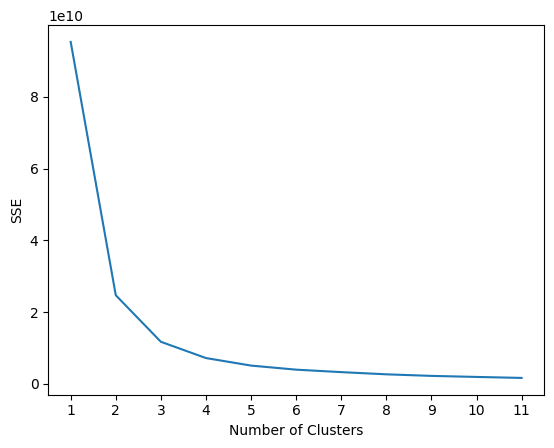

In [110]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# create numpy arrays for input data
X1 = np.array(dfMLdummies2[['Longitud de onda [Å]','Intensidad [1E-17 erg/cm2/s/Å]']])
#X2 = dfMLdummies['Longitud de onda [Å] VS Error'].tolist()



#create list to hold SSE values for each k

sse = []
sse2 = []


for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=2).fit(X1)
    sse.append(kmeans.inertia_)
    #kmeans = KMeans(n_clusters=k, random_state=2).fit(X2)
    #sse2.append(kmeans.inertia_)


#visualize results
plt.plot(range(1, 12), sse)
#plt.plot(range(1, 12)), sse2)
plt.xticks(range(1, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

#### 3.12.2. <a id='toc3_12_2_'></a>[El método de silhouette](#toc0_)

c:\Users\alvar\Documents\Tercero\Mineria de datos\MD-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=2: silhouette score = 0.6174987142710207


c:\Users\alvar\Documents\Tercero\Mineria de datos\MD-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=3: silhouette score = 0.5657836411425515


c:\Users\alvar\Documents\Tercero\Mineria de datos\MD-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=4: silhouette score = 0.5323863962565156


c:\Users\alvar\Documents\Tercero\Mineria de datos\MD-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=5: silhouette score = 0.5077773638920163


c:\Users\alvar\Documents\Tercero\Mineria de datos\MD-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=6: silhouette score = 0.4878543087247158


c:\Users\alvar\Documents\Tercero\Mineria de datos\MD-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=7: silhouette score = 0.4696166470155349


c:\Users\alvar\Documents\Tercero\Mineria de datos\MD-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=8: silhouette score = 0.49610552009944614


c:\Users\alvar\Documents\Tercero\Mineria de datos\MD-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=9: silhouette score = 0.48258753901374113


c:\Users\alvar\Documents\Tercero\Mineria de datos\MD-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=10: silhouette score = 0.470693375149274


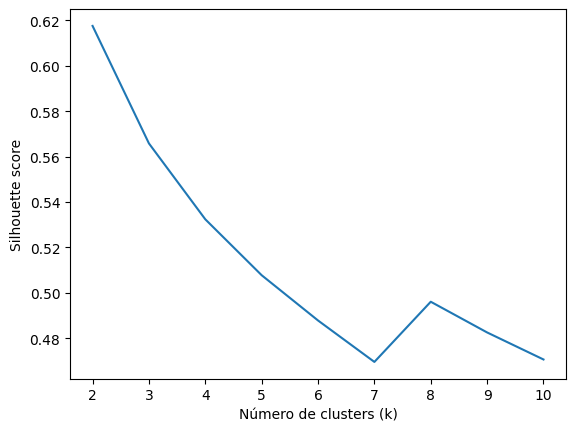

In [111]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score

# Creamos una lista con los datos del dataframe
X =  np.array(dfMLdummies2[['Longitud de onda [Å]','Intensidad [1E-17 erg/cm2/s/Å]']])
#Y = dfMLdummies['Longitud de onda [Å] VS Error'].tolist()

# Calculamos el silhouette score para diferentes valores de k
sil_scores = []
sil_scores2 = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=2).fit(X)
    sil_score = silhouette_score(X, kmeans.labels_)
    sil_scores.append(sil_score)
    print(f"k={k}: silhouette score = {sil_score}")
    #kmeans = KMeans(n_clusters=k, random_state=2).fit(Y)
    #sil_score2 = silhouette_score(Y, kmeans.labels_)
    #sil_scores2.append(sil_score2)
    #print(f"k={k}: silhouette score = {sil_score2}")

# Mostramos una gráfica con los resultados
import matplotlib.pyplot as plt

plt.plot(range(2, 11), sil_scores)
#plt.plot(range(2, 12), sil_scores2)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette score')
plt.show()

### 3.13. <a id='toc3_13_'></a>[Separamos nuestro modelo en entrenamiento y test](#toc0_)

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

okey = pd.DataFrame(MinMaxScaler().fit_transform(dfMLdummies2), columns=dfMLdummies2.columns)

target = okey.iloc[:, 2:]

dats = okey.iloc[:, :2]

dats.reset_index(drop=True, inplace = True)
target.reset_index(drop=True, inplace = True)

dats.head()

X_train, X_test, y_train, y_test = train_test_split(dats,
                                                    target,
                                                    test_size=0.5,
                                                    random_state=7,
                                                    stratify=target)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

okey.head()

Number transactions X_train dataset:  (19320, 2)
Number transactions y_train dataset:  (19320, 6)
Number transactions X_test dataset:  (19320, 2)
Number transactions y_test dataset:  (19320, 6)


,Longitud de onda [Å],Intensidad [1E-17 erg/cm2/s/Å],'A0','CV','F2','F5','G2','WD'
0,0.000000,0.057004,1.0,0.0,0.0,0.0,0.0,0.0
1,0.000161,0.056997,1.0,0.0,0.0,0.0,0.0,0.0
2,0.000321,0.056990,1.0,0.0,0.0,0.0,0.0,0.0
3,0.000482,0.056984,1.0,0.0,0.0,0.0,0.0,0.0
4,0.000643,0.056977,1.0,0.0,0.0,0.0,0.0,0.0


### 3.14. <a id='toc3_14_'></a>[Añadimos los modelos de clasificación múltiple](#toc0_)

In [113]:
models = []
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(random_state=7)))

#### 3.14.1. <a id='toc3_14_1_'></a>[Entrenámos los modelos y observamos su precisión](#toc0_)

In [114]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    try:
        kfold = model_selection.KFold(
            n_splits=10, random_state=None)  # 10-fold cross-validation

        cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
            model, X_train, y_train, cv=kfold, scoring='accuracy')

        cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
            model, X_train, y_train, cv=kfold, scoring='roc_auc')

        acc_results.append(cv_acc_results)
        auc_results.append(cv_auc_results)
        names.append(name)
        df_results.loc[i] = [name,
                            round(cv_auc_results.mean()*100, 2),
                            round(cv_auc_results.std()*100, 2),
                            round(cv_acc_results.mean()*100, 2),
                            round(cv_acc_results.std()*100, 2)
                            ]
        i += 1
    except Exception as e:
        # Manejo de la excepción
        print(f"Error con el modelo {name} ({model}): {str(e)}")
        continue
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Random Forest,98.32,0.18,87.29,0.49
1,KNN,97.41,0.35,86.81,0.70
2,Decision Tree Classifier,90.61,0.48,85.92,0.62


#### 3.14.2. <a id='toc3_14_2_'></a>[Comparamos la precisión de los modelos](#toc0_)

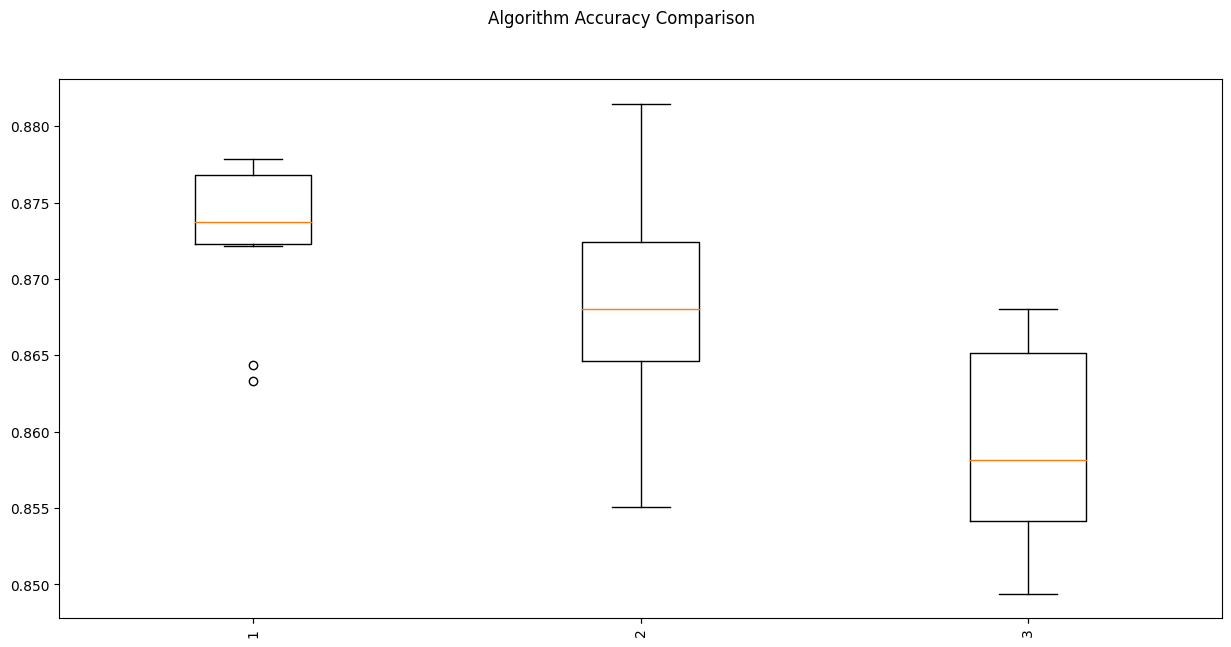

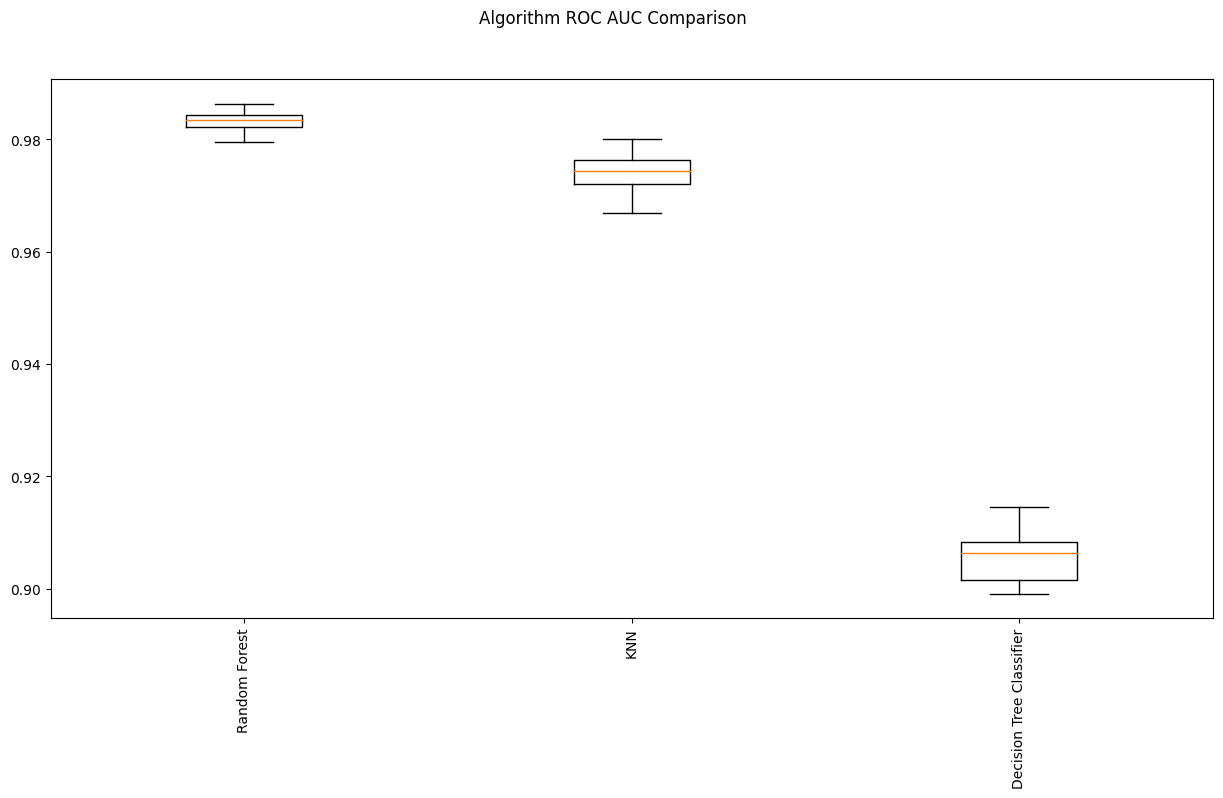

In [115]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot()

# set tick locations and labels
ax.set_xticks(range(1, len(names) + 1))
ax.set_xticklabels(names, rotation=90)

plt.boxplot(acc_results)
plt.show()

fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot()
plt.boxplot(auc_results)
ax.set_xticks(range(1, len(names) + 1))
ax.set_xticklabels(names, rotation=90)
plt.show()



#### 3.14.3. <a id='toc3_14_3_'></a>[Mostramos el las decisiones de Decision Tree Classifier](#toc0_)

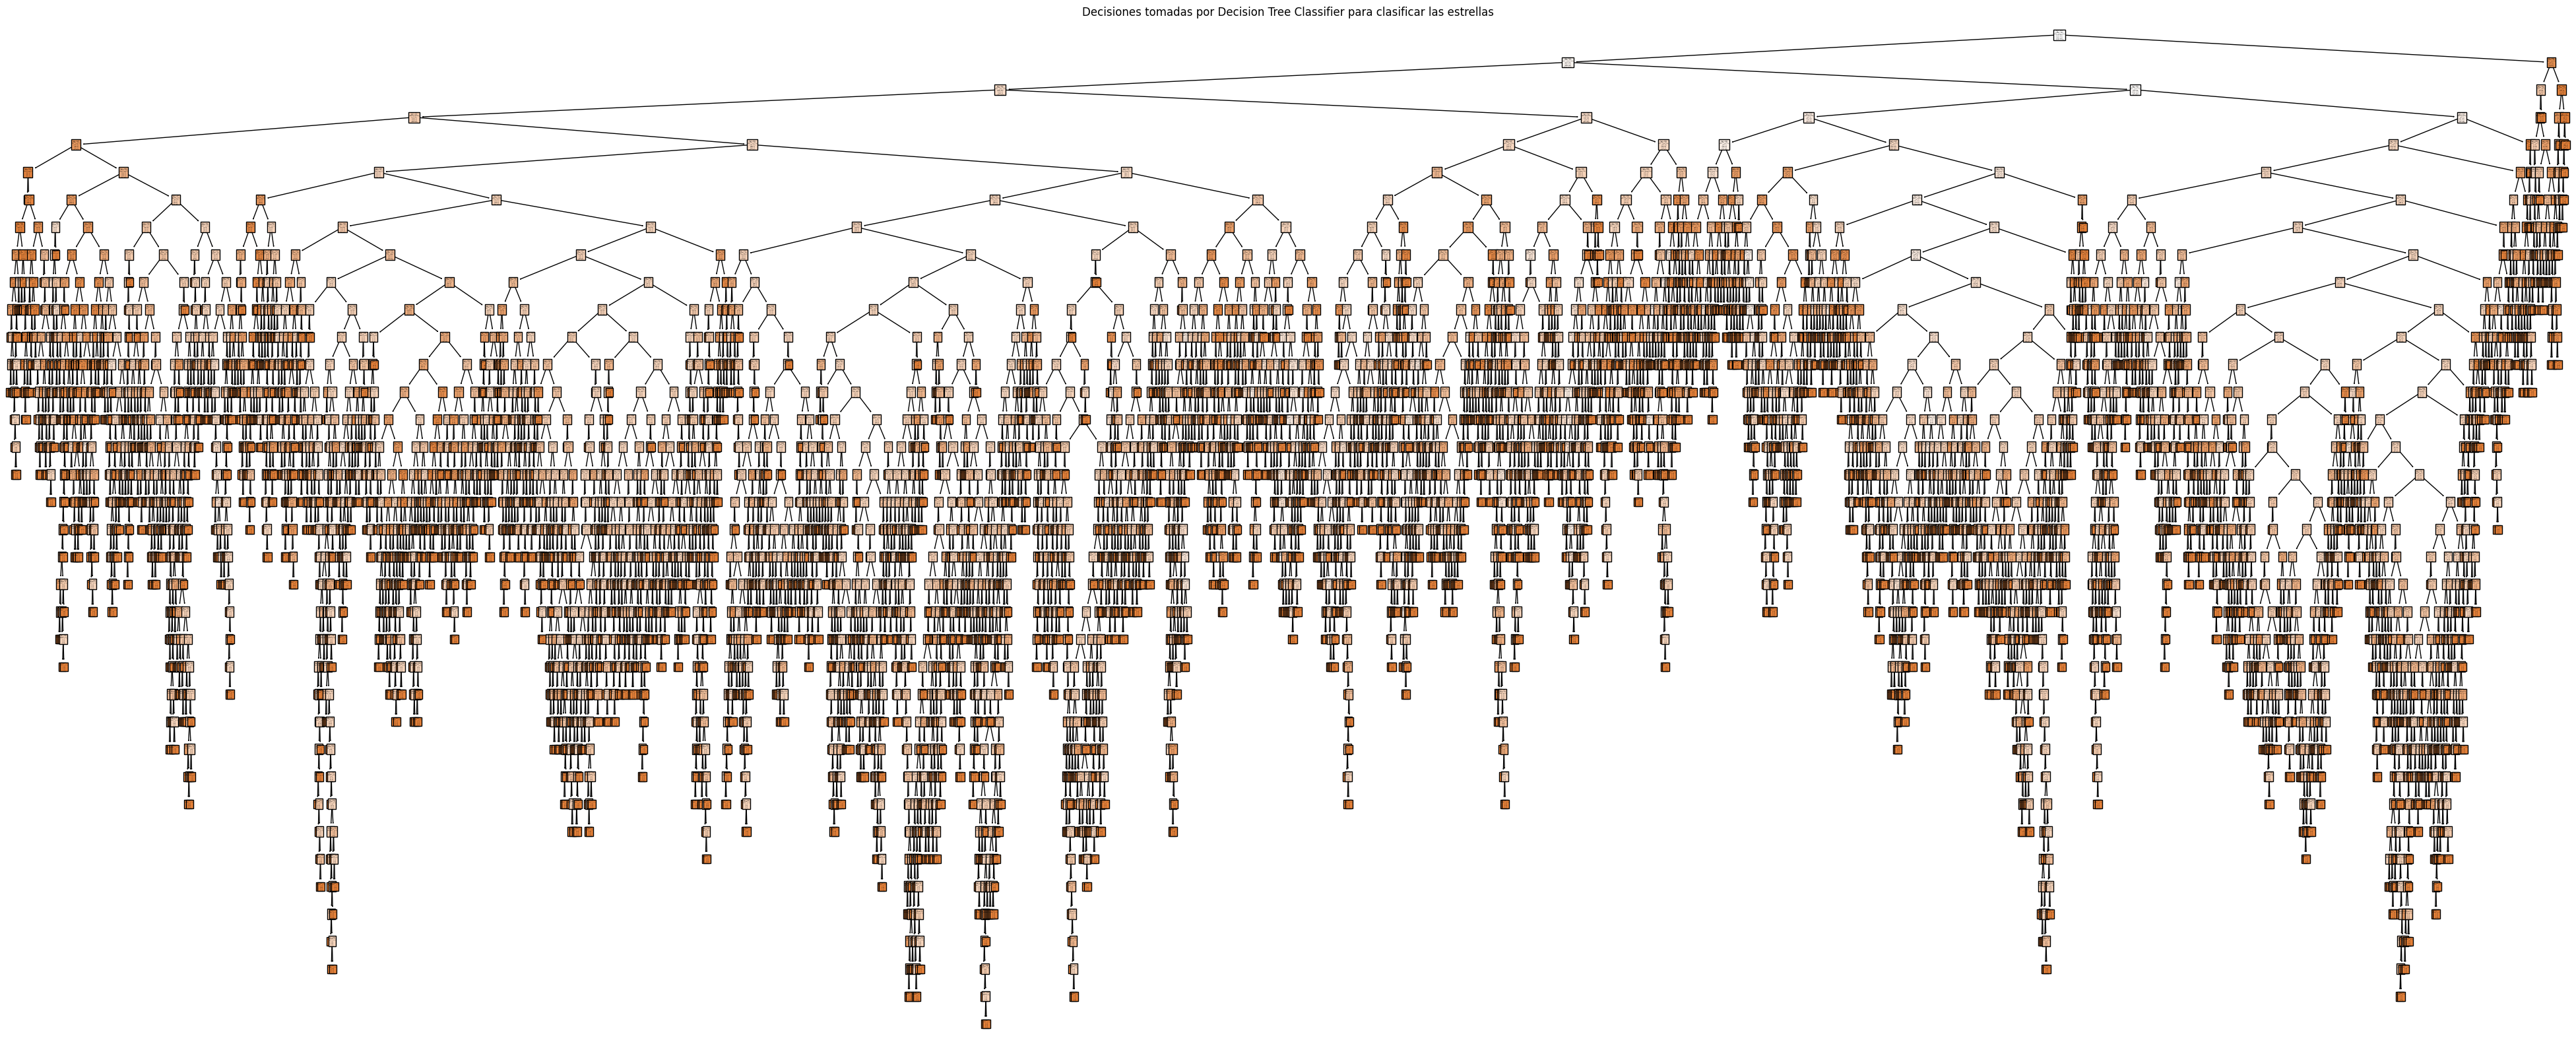

In [120]:
from sklearn.tree import plot_tree


plt.figure(figsize=(50, 20))
clf = DecisionTreeClassifier().fit(dats, target)
plot_tree(clf, filled=True)
plt.title("Decisiones tomadas por Decision Tree Classifier para clasificar las estrellas")
plt.show()

### 3.15. <a id='toc3_15_'></a>[Añadimos los modelos de clasificación unilateral](#toc0_)

In [116]:
Target_1D = []
Target_1D.append(('SVM', SVC(gamma='auto', random_state=7)))
Target_1D.append(('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=7)))
Target_1D.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7, class_weight='balanced')))
Target_1D.append(('Gaussian NB', GaussianNB()))

#### 3.15.1. <a id='toc3_15_1_'></a>[Entrenamos los modelos para cada tipo de estrella](#toc0_)

In [117]:
acc_results3 = []
auc_results3 = []
names3 = []
estrella = []
# set table to table to populate with performance results
col3 = ['Estrella','Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col3)
i = 0
# evaluate each model using cross-validation
for col in okey.columns[2:]:
    target2 = okey[col]

    dats2 = okey.iloc[:, :2]

    dats2.reset_index(drop=True, inplace = True)
    target2.reset_index(drop=True, inplace = True)

    #dats2.head()

    X_train2, X_test2, y_train2, y_test2 = train_test_split(dats2,
                                                        target2,
                                                        test_size=0.5,
                                                        random_state=7,
                                                        stratify=target2)  
    print("Number transactions X_train dataset: ", X_train2.shape)
    print("Number transactions y_train dataset: ", y_train2.shape)
    print("Number transactions X_test dataset: ", X_test2.shape)
    print("Number transactions y_test dataset: ", y_test2.shape)
    for name3, model in Target_1D:
        try:
            kfold = model_selection.KFold(
                n_splits=10, random_state=None)  # 10-fold cross-validation

            cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
                model, X_train2, y_train2, cv=kfold, scoring='accuracy')

            cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
                model, X_train2, y_train2, cv=kfold, scoring='roc_auc')

            acc_results.append(cv_acc_results)
            auc_results.append(cv_auc_results)
            names3.append(name3)
            estrella.append(col)
            df_results.loc[i] = [estrella ,name3,
                                round(cv_auc_results.mean()*100, 2),
                                round(cv_auc_results.std()*100, 2),
                                round(cv_acc_results.mean()*100, 2),
                                round(cv_acc_results.std()*100, 2)
                                ]
            i += 1
        except Exception as e:
            # Manejo de la excepción
            print(f"Error con el modelo {name3} ({model}): {str(e)}")
            continue
df_results.sort_values(by=['ROC AUC Mean'])

Number transactions X_train dataset:  (19320, 2)
Number transactions y_train dataset:  (19320,)
Number transactions X_test dataset:  (19320, 2)
Number transactions y_test dataset:  (19320,)
Number transactions X_train dataset:  (19320, 2)
Number transactions y_train dataset:  (19320,)
Number transactions X_test dataset:  (19320, 2)
Number transactions y_test dataset:  (19320,)
Number transactions X_train dataset:  (19320, 2)
Number transactions y_train dataset:  (19320,)
Number transactions X_test dataset:  (19320, 2)
Number transactions y_test dataset:  (19320,)
Number transactions X_train dataset:  (19320, 2)
Number transactions y_train dataset:  (19320,)
Number transactions X_test dataset:  (19320, 2)
Number transactions y_test dataset:  (19320,)
Number transactions X_train dataset:  (19320, 2)
Number transactions y_train dataset:  (19320,)
Number transactions X_test dataset:  (19320, 2)
Number transactions y_test dataset:  (19320,)
Number transactions X_train dataset:  (19320, 2)
N

,Estrella,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
10,"['A0', 'A0', 'A0', 'A0', 'CV', 'CV', 'CV', 'CV...",Logistic Regression,29.24,0.91,30.76,0.88
18,"['A0', 'A0', 'A0', 'A0', 'CV', 'CV', 'CV', 'CV...",Logistic Regression,35.72,1.42,35.95,1.60
2,"['A0', 'A0', 'A0', 'A0', 'CV', 'CV', 'CV', 'CV...",Logistic Regression,58.20,1.21,58.87,1.01
4,"['A0', 'A0', 'A0', 'A0', 'CV', 'CV', 'CV', 'CV...",SVM,61.56,6.03,90.00,0.52
23,"['A0', 'A0', 'A0', 'A0', 'CV', 'CV', 'CV', 'CV...",Gaussian NB,73.31,1.27,60.92,1.06
22,"['A0', 'A0', 'A0', 'A0', 'CV', 'CV', 'CV', 'CV...",Logistic Regression,79.36,1.12,72.19,0.79
20,"['A0', 'A0', 'A0', 'A0', 'CV', 'CV', 'CV', 'CV...",SVM,80.79,1.16,71.67,0.83
11,"['A0', 'A0', 'A0', 'A0', 'CV', 'CV', 'CV', 'CV...",Gaussian NB,81.37,1.00,90.00,0.52
0,"['A0', 'A0', 'A0', 'A0', 'CV', 'CV', 'CV', 'CV...",SVM,81.58,3.45,90.00,0.52
6,"['A0', 'A0', 'A0', 'A0', 'CV', 'CV', 'CV', 'CV...",Logistic Regression,86.71,0.69,61.79,1.34


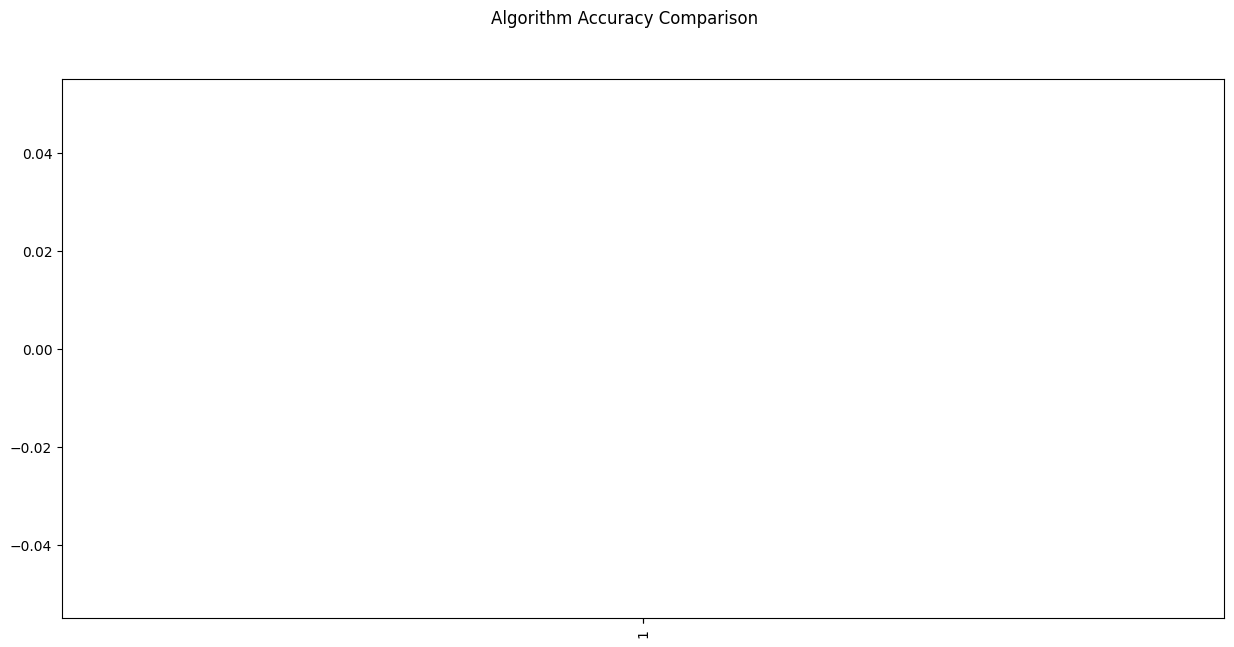

In [118]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot()

# set tick locations and labels
ax.set_xticks(range(1, len(names3) + 1))
ax.set_xticklabels(names3, rotation=90)

plt.boxplot(acc_results3)
plt.show()


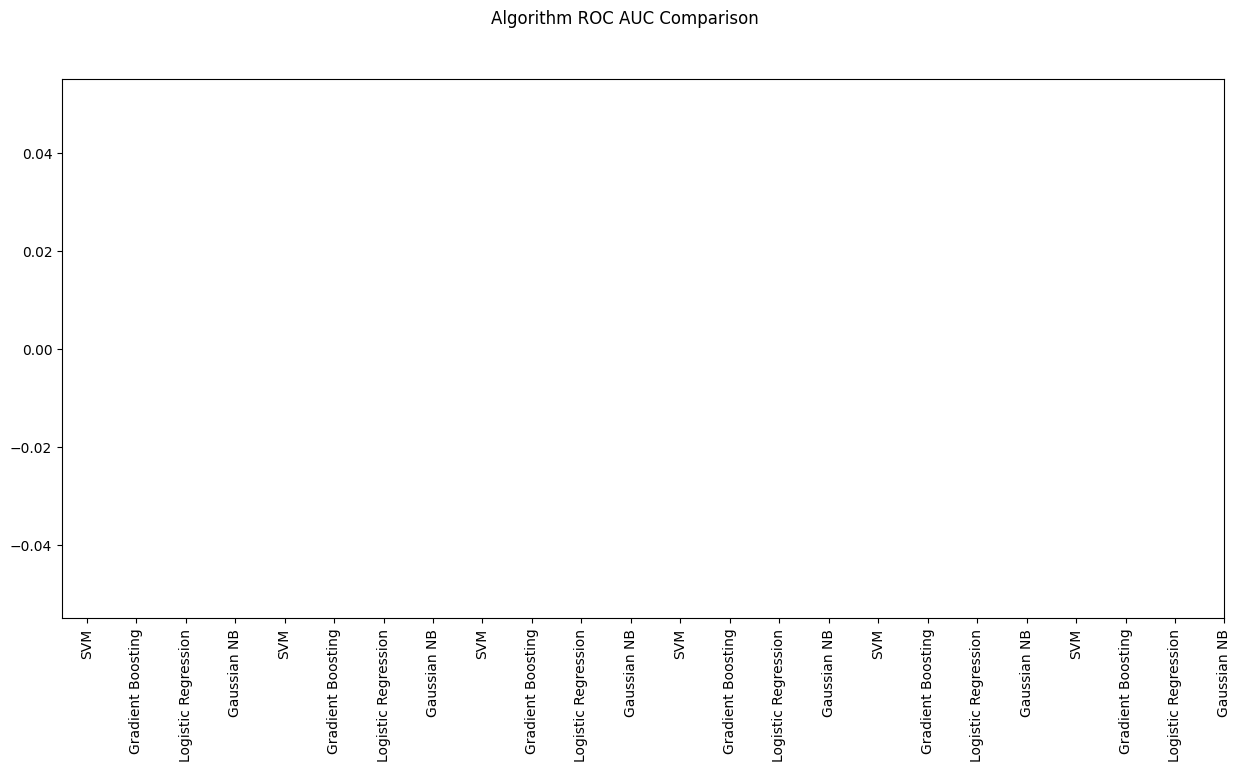

In [119]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot()
plt.boxplot(auc_results3)
ax.set_xticks(range(1, len(names3) + 1))
ax.set_xticklabels(names3, rotation=90)
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (24,) and arg 1 with shape (0,).

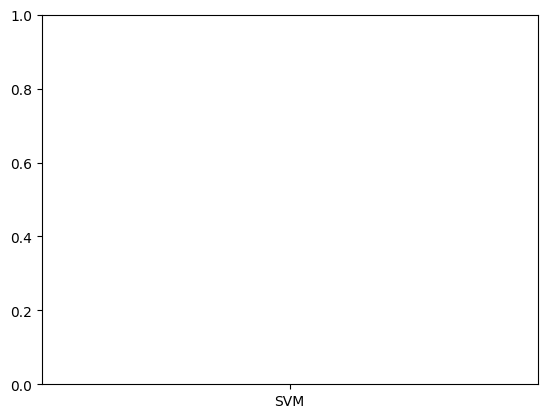

In [121]:
import matplotlib.pyplot as plt

# Plot accuracy results
plt.bar(names3, [acc.mean() for acc in acc_results3])
plt.title("Accuracy Results")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

# Plot ROC AUC results
plt.bar(names3, [auc.mean() for auc in auc_results3])
plt.title("ROC AUC Results")
plt.xlabel("Model")
plt.ylabel("ROC AUC")
plt.show()
